# Série TP 7 - Fouille de Données - Multiple Linear Regression 

## Part 2 - Linear Regression with scikit-learn

### 1 - Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm

### 1 - Dataset

In [7]:
df = pd.read_csv("Datasets/Advertising.csv")

In [8]:
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

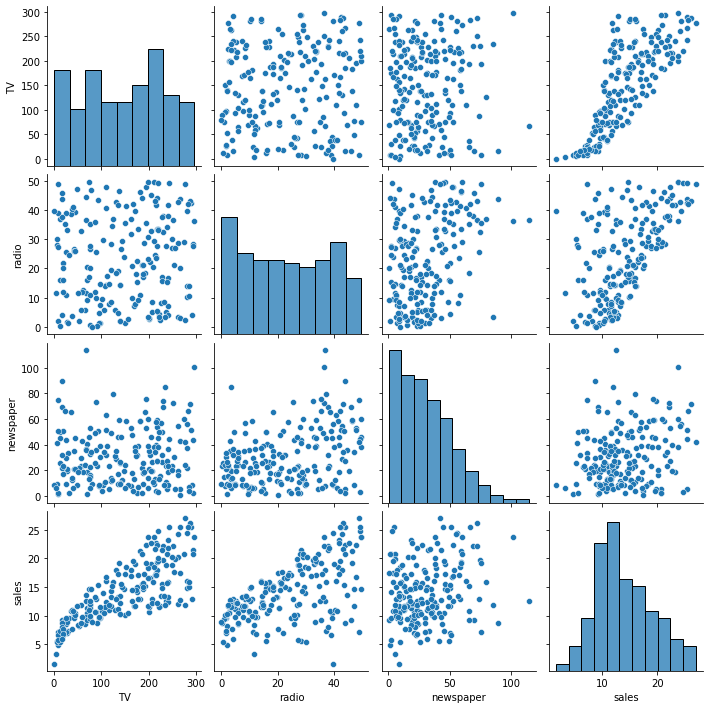

In [10]:
sns.pairplot(df)

The relationship between TV and sales seems to be pretty strong, and while there seems to be some trend between radio and sales, the relationship between newspaper and sales seems to be nonexistent. We can verify that also numerically through a correlation map:

<AxesSubplot:>

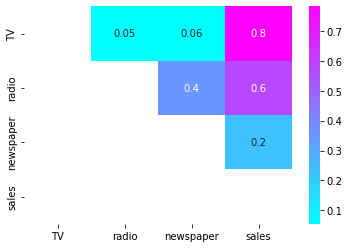

In [12]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [14]:
X = df.drop(['sales'], axis=1)
y = df['sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(140, 3) (140,) (60, 3) (60,)


### 3 - Train regression model - f(x) : sales = (b1 * TV)   + (b2 * radio)   +   (b3 * newspaper)  + b0

In [17]:
mlr = LinearRegression()

In [18]:
mlr.fit(X_train, y_train)

LinearRegression()

In [23]:
print('b0 =', mlr.intercept_)

b0 = 2.880255286331323


In [25]:
print('b1, b2, b3=', mlr.coef_)

b1, b2, b3= [0.04391531 0.20027962 0.00184368]


### 4 - Make predictions - predicting Y values of new example

In [36]:
x_example = [50, 30, 10]

y_example = sum(x_example * mlr.coef_) + mlr.intercept_  
print(y_example)

11.102846303480495


### 5 - Evaluate peformance of the model on test data

In [28]:
y_preds = mlr.predict(X_test)

In [29]:
y_preds

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

Mean Absolute Error: 1.2333759522850207
Mean Squared Error: 3.691394845698608
Root Mean Squared Error: 1.9213003007595164


#### Ref  : https://towardsdatascience.com/your-guide-to-linear-regression-models-df1d847185db